In [1]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import imageio 
def colormap(N=256, normalized=False):
    def bitget(byteval, idx):
        return ((byteval & (1 << idx)) != 0)

    dtype = 'float32' if normalized else 'uint8'
    cmap = np.zeros((N, 3), dtype=dtype)
    for i in range(N):
        r = g = b = 0
        c = i
        for j in range(8):
            r = r | (bitget(c, 0) << 7-j)
            g = g | (bitget(c, 1) << 7-j)
            b = b | (bitget(c, 2) << 7-j)
            c = c >> 3

        cmap[i] = np.array([r, g, b])

    cmap = cmap/255 if normalized else cmap
    return cmap

def encode_cmap(label):
    cmap = colormap()
    return cmap[label.astype(np.int16),:]

def lable_id2_num_id(label):
    num_id = range(1,81)
    label_id = list(range(1,91))
    pop_lst = [12,26,29,30,45,66,68,69,71,83]
    for item in pop_lst:
        label_id.remove(item)
    for num_i, label_i in zip(num_id,label_id):
        label[label==label_i] = num_i

    return label



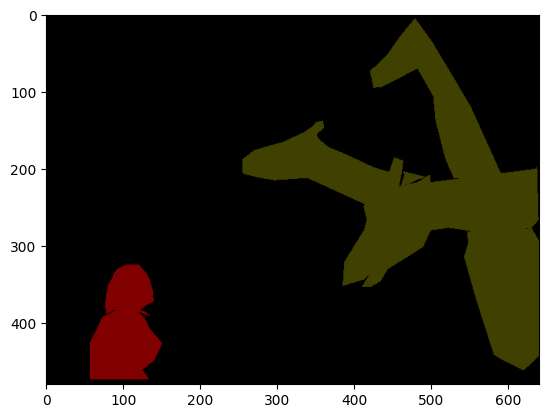

In [4]:
item_path = '/home/jaye/Documents/Datasets/MSCOCO/val_labels/class_labels/16238.png'
x = Image.open(item_path)
img =np.array(x.convert('L'))
# plt.imshow(img)
# plt.show()
img = lable_id2_num_id(img)
img_camp = encode_cmap(np.squeeze(img)).astype(np.uint8)
plt.imshow(img_camp)
plt.show()
img_name = item_path.split('class_labels/')[-1].zfill(16)
imageio.imsave(f'/home/jaye/Documents/PROJECTS/04_NeurIPS_RoCo/Paper/CAM_comparison_with_AFA_TOCO/supp/COCO_Preds/img&masks/COCO_val2014_{img_name}',img_camp)